# Multinomial Logistic Regression

In this script we use multinomial logistic regression to predict the handwritten digits of the MNIST dataset.

((4000, 1, 28, 28), (4000,), 28)


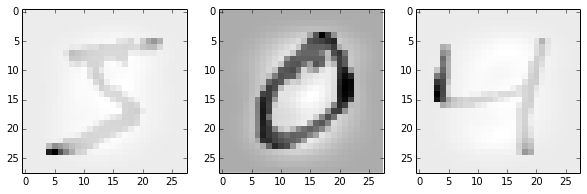

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import cPickle as pickle
import gzip
import time
import tensorflow as tf

with gzip.open('../../lasagne/mnist_4000.pkl.gz', 'rb') as f:
    (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])
print(X.shape, y.shape, PIXELS) #As read
fig = plt.figure(figsize=(10,30))
for i in range(3):
    a=fig.add_subplot(1,3,(i+1))
    plt.imshow(-X[i,0,:,:], interpolation='none',cmap=plt.get_cmap('gray'))

In [2]:
# We need to reshape for the logistic regression
X = X.reshape([4000, 784])
np.shape(X)

(4000, 784)

In [3]:
# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='float32')
    result[np.arange(len(vector)), vector] = 1
    return result

convertToOneHot(y[0:3], 10)

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

### Construction of the graph

In [4]:
tf.reset_default_graph()
tf.set_random_seed(1)
#Note that we usually do not like to specify the batchsize. Choosing it `None` will leave it open
x = tf.placeholder(tf.float32, shape=[None, 784], name='x_data')
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_data')

# We start with random weights a
w = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))

#<-------------------------- Your code here ---------------
# Your code here, do a matrix multiplication between x,w and an addtion of b
z = tf.matmul(x,w) + b
# End of your code

out = tf.nn.softmax(z)
init_op = tf.global_variables_initializer() 

### Store the graph and visualize it in tensorfboard

In [5]:
tf.summary.FileWriter("/tmp/dumm/mlp_tensorflow_solution/", tf.get_default_graph()).close() #<--- Where to store

### Doing a forward pass of the untrained network

In [6]:
with tf.Session() as sess:
    sess.run(init_op)
    res_val = sess.run(out, feed_dict={x:X[0:2]})
res_val

array([[ 0.11525527,  0.13671383,  0.08958026,  0.07389171,  0.11342651,
         0.10523579,  0.10331966,  0.07971238,  0.07903792,  0.10382659],
       [ 0.08793037,  0.09147878,  0.0712657 ,  0.11296913,  0.12209974,
         0.11581263,  0.08830554,  0.11783952,  0.09858031,  0.09371828]], dtype=float32)

### Train the model

In [7]:
loss = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(out), reduction_indices=[1]))

#train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
train_op = tf.train.AdagradOptimizer(0.1).minimize(loss)
init_op = tf.global_variables_initializer() 
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(1000):
        idx = np.random.permutation(2400)[0:128] #Easy minibatch of size 64
        #res, out_val, _ = sess.run((loss, out, train_op),feed_dict={x:X[idx], y_true:convertToOneHot(y[idx], 10)})
        loss_, out_val, _ = sess.run((loss, out, train_op),feed_dict={x:X[idx], y_true:convertToOneHot(y[idx], 10)})
        if (i % 100 == 0):
            print(loss_)
    
    # Get the loss for the validation results (from 2400:3000)
    print('Loss for the validation set')
    #<-------------------------- Your code here ---------------
    loss_val = sess.run((loss), feed_dict={x:X[2400:3000], y_true:convertToOneHot(y[2400:3000], 10)})
    print(loss_val)
    # Get the results for the validation set
    res_val = sess.run((out), feed_dict={x:X[2400:3000]})
    #<-------------------------  End of your code here --------

2.32989
0.222113
0.0672877
0.0839184
0.0487512
0.051582
0.0457237
0.0259907
0.0372335
0.0393421
Loss for the validation set
0.518132


In [8]:
# and estimate the preformance on the validation set
# Your code here
np.mean(np.argmax(res_val, axis = 1) == y[2400:3000])

0.88500000000000001